## Importing modules

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input

2024-11-14 19:33:29.663235: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Loading Data and Preprocessing

In [3]:
# Loading the data
from sklearn.datasets import load_digits
from tensorflow.keras.utils import to_categorical
digits = load_digits()
images = digits.images
targets = digits.target
targets_categorical = to_categorical(targets, num_classes=10)

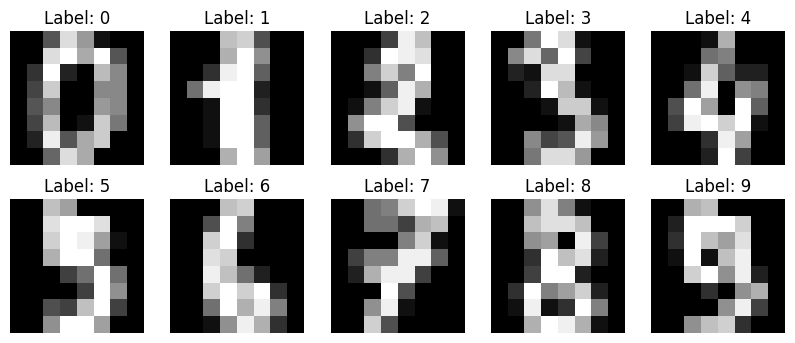

In [4]:
# Visualising our data
plt.figure(figsize=(10, 4))

# Display the first 10 images along with their target labels
for i in range(10):
    plt.subplot(2, 5, i + 1)  # 2 rows, 5 columns
    plt.imshow(images[i], cmap='gray')
    plt.title(f"Label: {targets[i]}")
    plt.axis('off')


In [5]:
# Preprocessing

# Normalizing the images
images = images / 16.0

# Adding dimension to images
images = np.expand_dims(images, axis=-1)  


In [6]:
from sklearn.model_selection import train_test_split
# Splitting our data
X_train, X_test, y_train, y_test = train_test_split(images, targets_categorical, test_size=0.2, random_state=42)


## Creating a CNN model

In [18]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(8, 8, 1)))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 6, 6, 32)       │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 1, 1, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,466 (76.04 KB)

 Trainable params: 19,466 (76.04 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Compile the model
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

## Train the model

In [21]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.2330 - loss: 2.2207 - val_accuracy: 0.6222 - val_loss: 1.8412
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7147 - loss: 1.6258 - val_accuracy: 0.8278 - val_loss: 1.0099
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8453 - loss: 0.8526 - val_accuracy: 0.8861 - val_loss: 0.5212
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9007 - loss: 0.4771 - val_accuracy: 0.9167 - val_loss: 0.3399
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9345 - loss: 0.3115 - val_accuracy: 0.9306 - val_loss: 0.2724
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9334 - loss: 0.2694 - val_accuracy: 0.9250 - val_loss: 0.2345
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9483 - loss: 0.2165 - val_accuracy: 0.9639 - val_loss: 0.1726
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9597 - loss: 0.1941 - val_accuracy: 0.9611 - val_lo

## Testing the model

In [22]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9646 - loss: 0.1351
Test Loss: 0.13927385210990906
Test Accuracy: 0.9611111283302307


## Modifying the Model to Output Feature Maps

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.2761 - loss: 2.2056 - val_accuracy: 0.8583 - val_loss: 1.7939
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8455 - loss: 1.5658 - val_accuracy: 0.8722 - val_loss: 0.8391
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8976 - loss: 0.7210 - val_accuracy: 0.9222 - val_loss: 0.4136
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9340 - loss: 0.3620 - val_accuracy: 0.9278 - val_loss: 0.2902
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9258 - loss: 0.2869 - val_accuracy: 0.9361 - val_loss: 0.2288
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9328 - loss: 0.2550 - val_accuracy: 0.9472 - val_loss: 0.1852
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9564 - loss: 0.1748 - val_accuracy: 0.9528 - val_loss: 0.1668
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9527 - loss: 0.1633 - val_accuracy: 0.9667 - val_loss

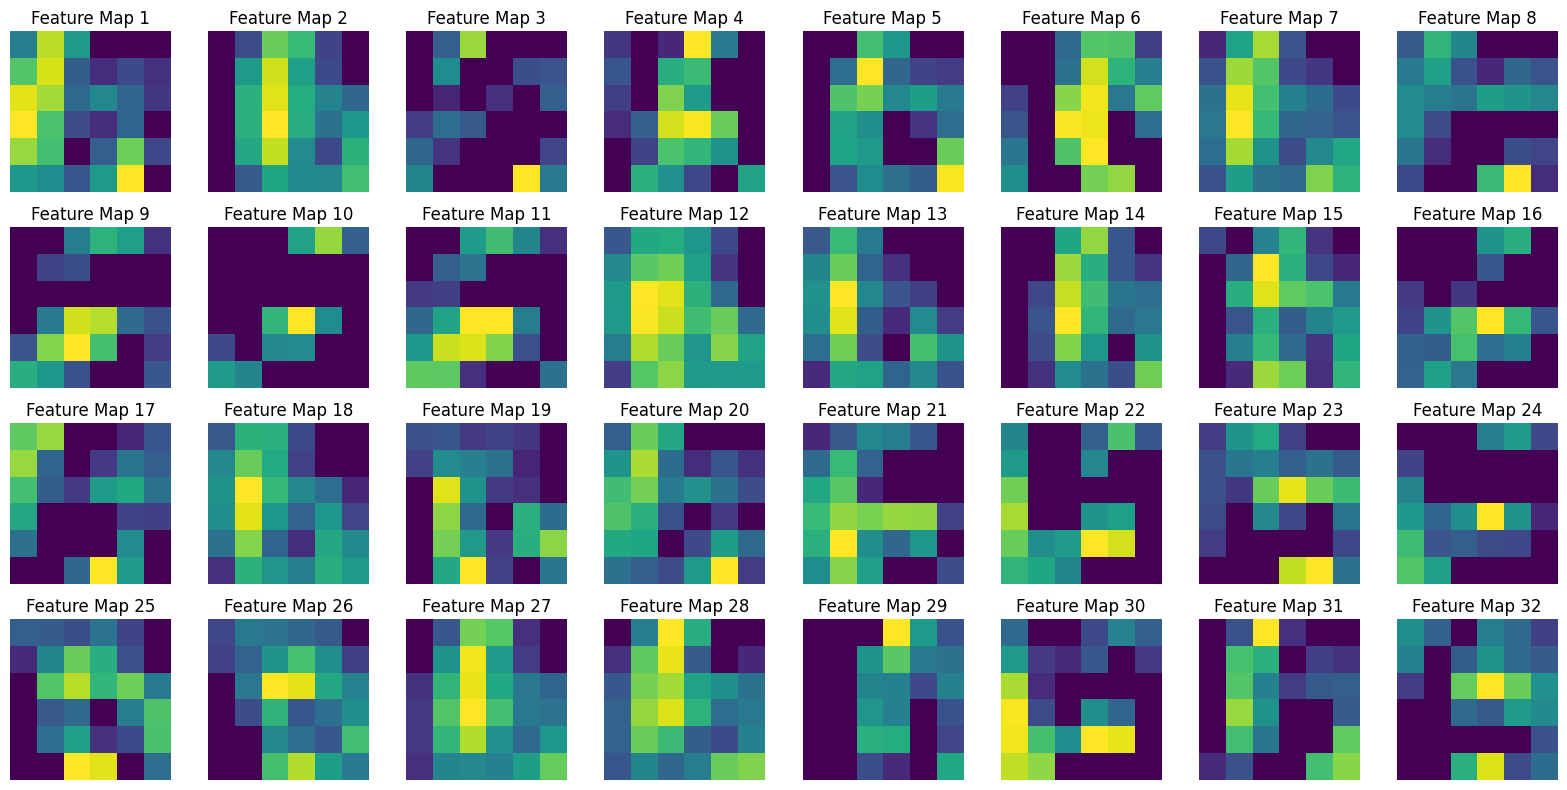

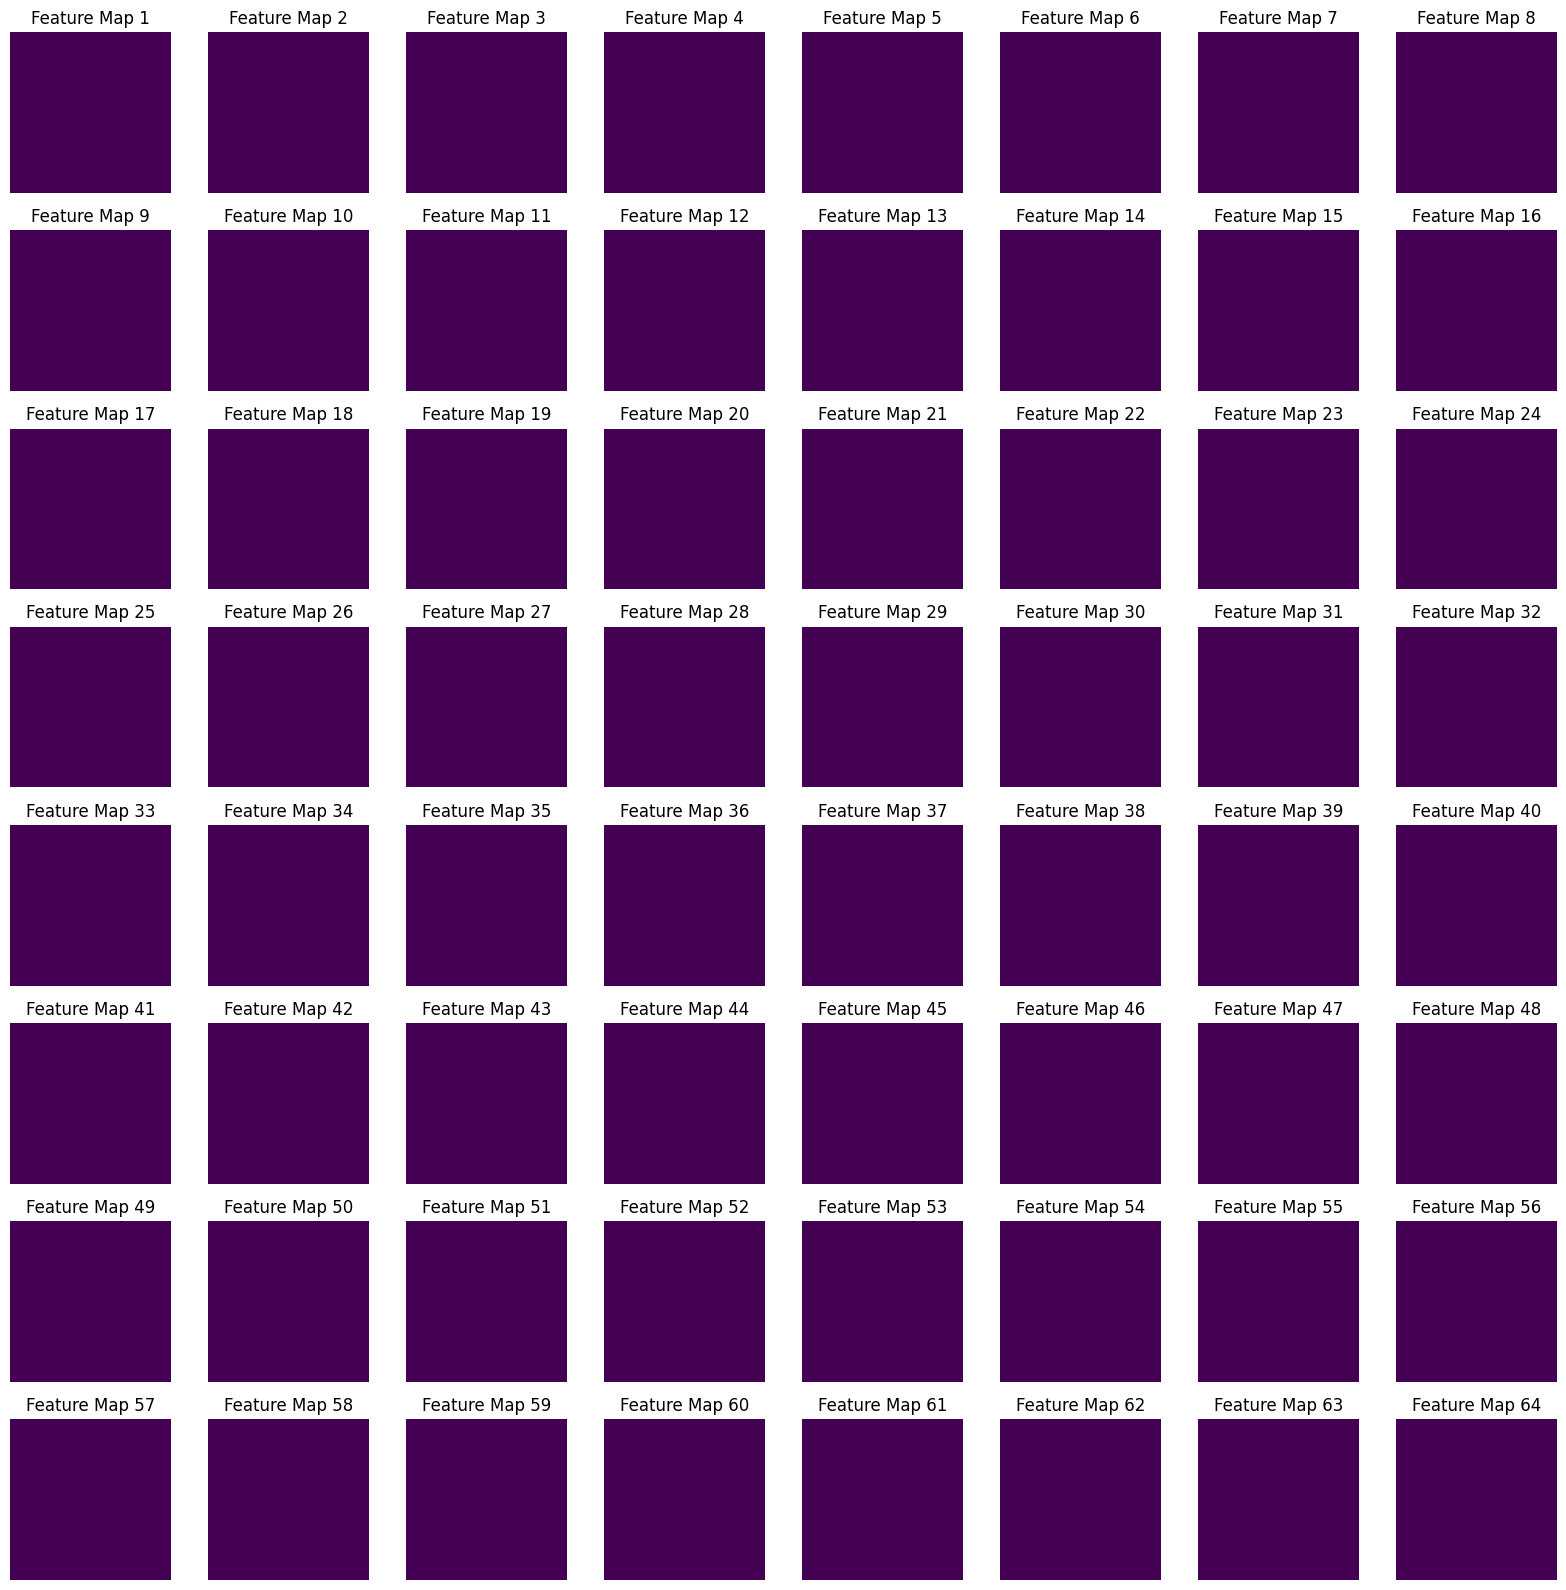

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9749 - loss: 0.0985
Test Loss: 0.11407603323459625
Test Accuracy: 0.9666666388511658


In [31]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input
from sklearn.datasets import load_digits
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

# Load the digits dataset
digits = load_digits()
images = digits.images
targets = digits.target
targets_categorical = to_categorical(targets, num_classes=10)

# Normalize the images and reshape them
images = images / 16.0
images = np.expand_dims(images, axis=-1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images, targets_categorical, test_size=0.2, random_state=42)

# Define the model using the Functional API
input_layer = Input(shape=(8, 8, 1))  # Input layer with shape (8, 8, 1)

# First convolutional layer
x = Conv2D(32, (3, 3), activation='relu')(input_layer)

# MaxPooling layer
x = MaxPooling2D()(x)

# Second convolutional layer
x = Conv2D(64, (3, 3), activation='relu')(x)

# Flatten the output for the Dense layer
x = Flatten()(x)

# Output layer (softmax for classification)
output_layer = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Create a new model that will output the feature maps from each Conv2D layer
layer_outputs = [layer.output for layer in model.layers if isinstance(layer, Conv2D)]
feature_map_model = Model(inputs=model.input, outputs=layer_outputs)

# Select a test image
test_image = X_test[0:1]  # Select the first test image (batch size = 1)

# Get the feature maps
feature_maps = feature_map_model.predict(test_image)

# Visualize the feature maps for each convolutional layer
for i, feature_map in enumerate(feature_maps):
    num_filters = feature_map.shape[-1]  # Number of filters in this layer
    num_columns = 8  # Maximum number of feature maps to show per row
    num_rows = (num_filters // num_columns) + (1 if num_filters % num_columns > 0 else 0)  # Calculate number of rows needed

    # Create a figure with a larger size for better visibility
    plt.figure(figsize=(num_columns * 2, num_rows * 2))

    for j in range(num_filters):
        # Get the feature map for the j-th filter
        feature_map_j = feature_map[0, :, :, j]

        # Check if the min and max values are equal (i.e., constant feature map)
        if feature_map_j.min() == feature_map_j.max():
            # If the feature map is constant, replace it with zeros (blank image)
            feature_map_j = np.zeros_like(feature_map_j)
        else:
            # Normalize the feature map to the range [0, 1] for better visualization
            feature_map_j = (feature_map_j - feature_map_j.min()) / (feature_map_j.max() - feature_map_j.min())

            # Optional: Apply thresholding to filter out very small values (helps visualize faint activations)
            feature_map_j[feature_map_j < 0.1] = 0  # Threshold small activations (adjust this value as needed)

        # Create a subplot for each feature map
        plt.subplot(num_rows, num_columns, j + 1)
        plt.imshow(feature_map_j, cmap='viridis')  # Use 'viridis' color map for better contrast
        plt.axis('off')  # Turn off axis
        plt.title(f'Feature Map {j + 1}')

    # Adjust layout and show the feature maps
    plt.tight_layout()
    plt.show()



# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

